# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [65]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [66]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [67]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [72]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, "html.parser")
mars_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [73]:
#scratch work
table_elements[0].find_all("td")

[<td>2</td>,
 <td>2012-08-16</td>,
 <td>10</td>,
 <td>155</td>,
 <td>6</td>,
 <td>-75.0</td>,
 <td>739.0</td>,
 <td>13</td>,
 <td>2012-08-17</td>,
 <td>11</td>,
 <td>156</td>,
 <td>6</td>,
 <td>-76.0</td>,
 <td>740.0</td>,
 <td>24</td>,
 <td>2012-08-18</td>,
 <td>12</td>,
 <td>156</td>,
 <td>6</td>,
 <td>-76.0</td>,
 <td>741.0</td>,
 <td>35</td>,
 <td>2012-08-19</td>,
 <td>13</td>,
 <td>157</td>,
 <td>6</td>,
 <td>-74.0</td>,
 <td>732.0</td>,
 <td>46</td>,
 <td>2012-08-20</td>,
 <td>14</td>,
 <td>157</td>,
 <td>6</td>,
 <td>-74.0</td>,
 <td>740.0</td>,
 <td>57</td>,
 <td>2012-08-21</td>,
 <td>15</td>,
 <td>158</td>,
 <td>6</td>,
 <td>-78.0</td>,
 <td>740.0</td>,
 <td>68</td>,
 <td>2012-08-22</td>,
 <td>16</td>,
 <td>158</td>,
 <td>6</td>,
 <td>-77.0</td>,
 <td>740.0</td>,
 <td>79</td>,
 <td>2012-08-23</td>,
 <td>17</td>,
 <td>159</td>,
 <td>6</td>,
 <td>-76.0</td>,
 <td>742.0</td>,
 <td>112</td>,
 <td>2012-08-27</td>,
 <td>21</td>,
 <td>161</td>,
 <td>6</td>,
 <td>-74.0</td>,
 <td>741.

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [75]:
#Credit to Instructor Eli Rosenberg for this section of code - it was shared during lecture
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in table_elements:
    cell_values = row.find_all("td")
    values = []
    for value in cell_values:
        values.append(value.text)
    data_rows.append(values)

data_rows

[['2',
  '2012-08-16',
  '10',
  '155',
  '6',
  '-75.0',
  '739.0',
  '13',
  '2012-08-17',
  '11',
  '156',
  '6',
  '-76.0',
  '740.0',
  '24',
  '2012-08-18',
  '12',
  '156',
  '6',
  '-76.0',
  '741.0',
  '35',
  '2012-08-19',
  '13',
  '157',
  '6',
  '-74.0',
  '732.0',
  '46',
  '2012-08-20',
  '14',
  '157',
  '6',
  '-74.0',
  '740.0',
  '57',
  '2012-08-21',
  '15',
  '158',
  '6',
  '-78.0',
  '740.0',
  '68',
  '2012-08-22',
  '16',
  '158',
  '6',
  '-77.0',
  '740.0',
  '79',
  '2012-08-23',
  '17',
  '159',
  '6',
  '-76.0',
  '742.0',
  '112',
  '2012-08-27',
  '21',
  '161',
  '6',
  '-74.0',
  '741.0',
  '114',
  '2012-08-28',
  '22',
  '162',
  '6',
  '-74.0',
  '742.0',
  '123',
  '2012-08-29',
  '23',
  '162',
  '6',
  '-75.0',
  '741.0',
  '134',
  '2012-08-30',
  '24',
  '163',
  '6',
  '-75.0',
  '742.0',
  '145',
  '2012-08-31',
  '25',
  '163',
  '6',
  '-75.0',
  '743.0',
  '156',
  '2012-09-01',
  '26',
  '164',
  '6',
  '-76.0',
  '745.0',
  '163',
  '201

In [77]:
# Create an empty list to store rows of data
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table_elements:
    values = []  # Reset the values list for each row
    cell_values = row.find_all("td")  # Find all 'td' elements (table cells)
    
    # Extract the text from each cell and append to the values list
    for value in cell_values:
        values.append(value.text.strip())  # Strip any extra whitespace
    
    # Append the row of values to data_rows
    data_rows.append(values)

# Print the data_rows list to inspect its structure
print(data_rows)

# Check if each row has 7 elements (as expected)
for row in data_rows:
    print(len(row))  # Should print 7 for each row

# Create a DataFrame from the list of rows
mars_df = pd.DataFrame(data_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Convert the necessary columns to appropriate data types
mars_df['id'] = pd.to_numeric(mars_df['id'])
mars_df['sol'] = pd.to_numeric(mars_df['sol'])
mars_df['ls'] = pd.to_numeric(mars_df['ls'])
mars_df['month'] = pd.to_numeric(mars_df['month'])
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])

# Print the first few rows of the DataFrame to verify
print(mars_df.head())


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0', '13', '2012-08-17', '11', '156', '6', '-76.0', '740.0', '24', '2012-08-18', '12', '156', '6', '-76.0', '741.0', '35', '2012-08-19', '13', '157', '6', '-74.0', '732.0', '46', '2012-08-20', '14', '157', '6', '-74.0', '740.0', '57', '2012-08-21', '15', '158', '6', '-78.0', '740.0', '68', '2012-08-22', '16', '158', '6', '-77.0', '740.0', '79', '2012-08-23', '17', '159', '6', '-76.0', '742.0', '112', '2012-08-27', '21', '161', '6', '-74.0', '741.0', '114', '2012-08-28', '22', '162', '6', '-74.0', '742.0', '123', '2012-08-29', '23', '162', '6', '-75.0', '741.0', '134', '2012-08-30', '24', '163', '6', '-75.0', '742.0', '145', '2012-08-31', '25', '163', '6', '-75.0', '743.0', '156', '2012-09-01', '26', '164', '6', '-76.0', '745.0', '163', '2012-09-02', '27', '164', '6', '-75.0', '743.0', '170', '2012-09-03', '28', '165', '6', '-75.0', '745.0', '171', '2012-09-04', '29', '166', '6', '-75.0', '747.0', '172', '2012-09-05', '30', '166', '6',

ValueError: 7 columns passed, passed data had 13069 columns

In [79]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,7,8,9,...,13059,13060,13061,13062,13063,13064,13065,13066,13067,13068
0,2,2012-08-16,10,155,6,-75.0,739.0,13,2012-08-17,11,...,5,-77.0,728.0,1895,2018-02-27,1977,135,5,-77.0,727.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [80]:
# Examine data type of each column
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
                         ...      
13064                       object
13065                       object
13066                       object
13067                       object
13068                       object
Length: 13069, dtype: object

In [58]:
# Change data types for data analysis
mars_df["id"]= pd.to_numeric(mars_df["id"])
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = pd.to_numeric(mars_df["sol"])
mars_df["ls"] = pd.to_numeric(mars_df["ls"])
mars_df["month"] = pd.to_numeric(mars_df["month"])
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"])
mars_df["pressure"] = pd.to_numeric(mars_df["pressure"])

In [37]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
                         ...      
13064                       object
13065                       object
13066                       object
13067                       object
13068                       object
Length: 13069, dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [59]:
# 1. How many months are there on Mars?
mars_df['month'].max()

6

In [64]:
print(mars_df["sol"].unique())

[10]


In [40]:
# 3. What is the average minimum temperature by month?
average_low_temp = mars_df["min_temp"].groupby(mars_df['month']).mean()
average_low_temp

month
6   -75.0
Name: min_temp, dtype: float64

Text(0, 0.5, 'average_low_temp')

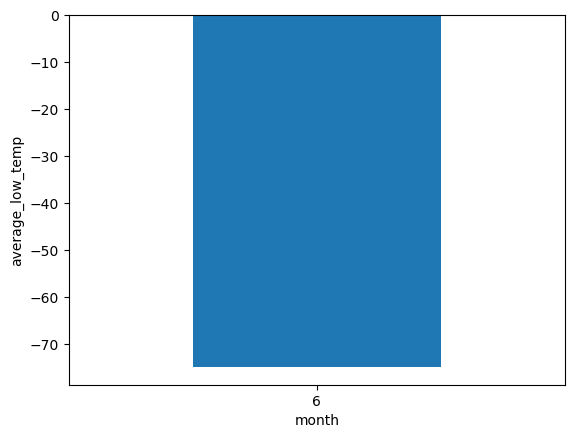

In [41]:
# Plot the average minimum temperature by month
average_low_temp.plot.bar(rot = 0)
plt.ylabel("average_low_temp")

In [42]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Identify the coldest and hottest months in Curiosity's location
hottest_month = average_low_temp.idxmax()
hottest_month_temp = average_low_temp.max()
coldest_month = average_low_temp.idxmin()
coldest_month_temp = average_low_temp.min()
print(f"Month #{hottest_month} had the hottest average temperature of {hottest_month_temp}")
print(f"Month #{coldest_month} had the coldest average temperature of {coldest_month_temp}")

Month #6 had the hottest average temperature of -75.0
Month #6 had the coldest average temperature of -75.0


In [43]:
# 4. What is the average pressure by month?
avg_pressure_monthly = mars_df["pressure"].groupby(mars_df["month"]).mean()
avg_pressure_monthly

month
6    739.0
Name: pressure, dtype: float64

Text(0, 0.5, 'Pressure (mmHg)')

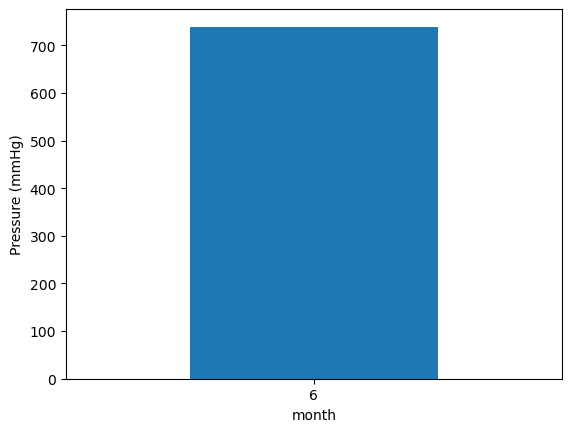

In [81]:
# Plot the average pressure by month
avg_pressure_monthly.plot.bar(rot=0)
plt.ylabel("Pressure (mmHg)")

In [45]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
new_mars_df = mars_df.set_index("terrestrial_date")
new_mars_df

,id,sol,ls,month,min_temp,pressure,7,8,9,10,...,13059,13060,13061,13062,13063,13064,13065,13066,13067,13068
terrestrial_date,,,,,,,,,,,,,,,,,,,,,
2012-08-16,2,10,155,6,-75.0,739.0,13,2012-08-17,11,156,...,5,-77.0,728.0,1895,2018-02-27,1977,135,5,-77.0,727.0


In [46]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
new_mars_df = mars_df.set_index("terrestrial_date")
new_mars_df

,id,sol,ls,month,min_temp,pressure,7,8,9,10,...,13059,13060,13061,13062,13063,13064,13065,13066,13067,13068
terrestrial_date,,,,,,,,,,,,,,,,,,,,,
2012-08-16,2,10,155,6,-75.0,739.0,13,2012-08-17,11,156,...,5,-77.0,728.0,1895,2018-02-27,1977,135,5,-77.0,727.0


#### Minimum Temperature

YOUR ANALYSIS HERE

In [49]:
#find all ls= 0 dates
ls_0_list = new_mars_df.loc[new_mars_df["ls"] == 0]
ls_0_list

,id,sol,ls,month,min_temp,pressure,7,8,9,10,...,13059,13060,13061,13062,13063,13064,13065,13066,13067,13068
terrestrial_date,,,,,,,,,,,,,,,,,,,,,


In [50]:
#disregard, scratch code

mars_ls_max = new_mars_df["ls"].max()
mars_ls_min = new_mars_df["ls"].min()
mars_ls_max_date = new_mars_df["ls"].idxmax()
mars_ls_min_date = new_mars_df["ls"].idxmin()
print(mars_ls_max)
print(mars_ls_max_date)
print(mars_ls_min)
print(mars_ls_min_date)

155
2012-08-16 00:00:00
155
2012-08-16 00:00:00


#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
output_path = "mars_data.csv"
new_mars_df.to_csv(output_path)

In [48]:
browser.quit()